# Support Class 2 - Problem sheet 1

In [1]:
# Load some packages 
# (if you get an error, you need to install the package in the terminal)
import numpy as np                #scientific computing
import matplotlib.pyplot as plt   #plotting
import seaborn as sns             #helps with data manipulation/plotting

#### Question 3 (c)

First define the transition matrix P.

In [2]:
P = np.array([[0.5,0.25,0.25],[0.25,0.5,0.25],[0.25,0.25,0.5]])
print(P)

[[0.5  0.25 0.25]
 [0.25 0.5  0.25]
 [0.25 0.25 0.5 ]]


Next we construct a function that will run our Markov chain (over the three states "1", "2", and "3") for a given transisition matrix P, number of steps, number of realisations, and set of initial states. 

Take some time to go through the function below as it may not be obvious what is going on. There are other ways of writing it too!

In [3]:
#This is a python function for simulating the RW. It takes inputs:
# P: transistion matrix (3 by 3)
# tmax: number of time steps
# N: no. of independent random walks to simulate
# IC: initial starting position for each of the chains (array of length N)

def ThreeStateMC(P, tmax, N, IC):
    Y = np.zeros((N,tmax))          #array to store the state of the MC at each time for each realisation
    Y[:,0] = IC                     #initialise all realisations
    
    #simulate the chain for each time step in a loop
    for j in range(0,tmax-1):
        #these indexes finds out where the current state is (for each realisation)
        state1 = (Y[:,j] == 1)
        state2 = (Y[:,j] == 2)
        state3 = (Y[:,j] == 3)
        
        #next we randomly sample from choices [1,2,3] with probability for each given by the row of the current state j
        # (we do this N times, where N is the number of states currently in state j)
        # i.e. at t = 0, suppose all realisations are in state 1, therefore we sample N times 
        # with probabilities given by the first row of P. 
        r1 = np.random.choice([1,2,3],sum(state1),replace=True,p = P[0,:])
        r2 = np.random.choice([1,2,3],sum(state2),replace=True,p = P[1,:])
        r3 = np.random.choice([1,2,3],sum(state3),replace=True,p = P[2,:])
        
        #now we advance each of the states at time j, to the new states at time j+1
        Y[state1,j+1] = r1
        Y[state2,j+1] = r2
        Y[state3,j+1] = r3
        
    return Y

In [4]:
#now we can answer the question (run the function)
tmax = 1000
N = 500
IC = np.ones(N)

Y = ThreeStateMC(P,tmax,N,IC)

Plot the empirical distributions of the set of 500 MCs at different time slices and we should hopefully see the set of chains converging to our stationary distribution. 

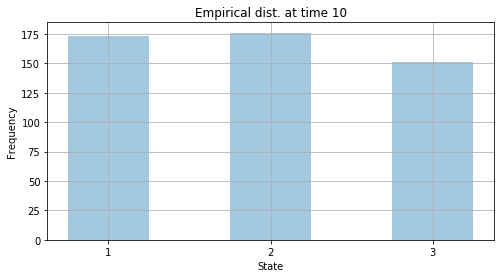

In [5]:
time = 10

plt.figure(figsize = (8,4))
plt.title('Empirical dist. at time 10')
plt.grid()
sns.distplot(Y[:,time-1],bins = [0.75,1.25,1.75,2.25,2.75,3.25],kde=False)
plt.xticks([1,2,3])
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

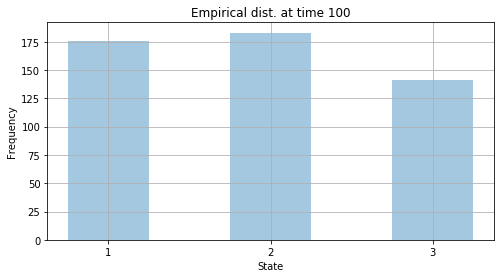

In [6]:
time = 100

plt.figure(figsize = (8,4))
plt.title('Empirical dist. at time 100')
plt.grid()
sns.distplot(Y[:,time-1],bins = [0.75,1.25,1.75,2.25,2.75,3.25],kde=False)
plt.xticks([1,2,3])
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

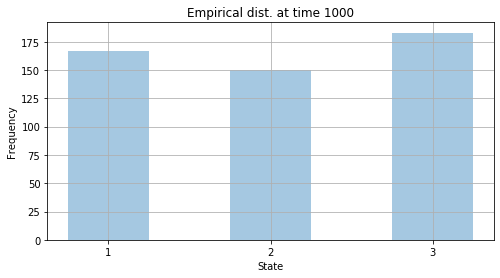

In [7]:
time = 1000

plt.figure(figsize = (8,4))
plt.title('Empirical dist. at time 1000')
plt.grid()
sns.distplot(Y[:,time-1],bins = [0.75,1.25,1.75,2.25,2.75,3.25],kde=False)
plt.xticks([1,2,3])
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

#### Question 4 (c)

Here we simulate the full dynamics of the Wright-Fisher model from Q4(a).

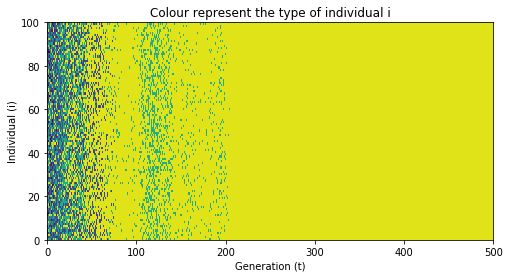

In [4]:
#define our input parameters
tmax = 500   #max time steps
L = 100      #no. of individuals in population

#store solutions (states) in a tmax by L matrix
X = np.zeros((L,tmax))

#initialise the population at t=0 (i.e. Xi(t=0) = i)
X[:,0] = np.arange(L)+1   # types range from 1 to L
         
#loop over time to simulate each generational jump
for t in range(0,tmax-1):
    old_states = X[:,t]   #define old states

    #each new state is randomly chosen (uniformly) from the set of states at the previous generation
    new_states = [old_states[r] for r in np.random.randint(0,L,L)]

    #store new states at next generation
#   X[:,t+1] = np.sort(new_states)        #try it with np.sort
    X[:,t+1] = new_states

    
#plot a heat map
plt.figure(figsize = (8,4))
plt.xlabel('Generation (t)')
plt.ylabel('Individual (i)')
plt.title('Colour represent the type of individual i')
plt.pcolor(X)



What happens as $T \rightarrow \infty$?

How long does it take to reach this set of states? We can empirically check this.

In [5]:
#first define a short function that verifies whether we've reached the steady state
def check(x):
    # calculates the unique elements of vector x (returns true if single element in x)
    x = np.unique(x) 
    if x.shape[0] > 1:
        return False
    else:
        return True


In [6]:
# now we can copy our code from above and run it over multiple realisations

#define our input parameters
tmax = 500      #max time steps
L = 100        #max no. of individuals in population
repeats = 100   #no. of repeats

#we run the MC for each population of individuals (1,...,L)
LL = np.arange(1,L+1)
M = np.zeros((L,repeats))

for i in range(0,L):
    for j in range(0, repeats):
        
        #store solutions (states) in a tmax by L matrix
        X = np.zeros((LL[i],tmax))
        
        #initialise the population at t=0 (i.e. Xi(t=0) = i)
        X[:,0] = np.arange(LL[i])+1   # types range from 1 to LL[i]
        
        #loop over time to simulate each generational jump
        for t in range(0,tmax-1):
            old_states = X[:,t]   #define old states
            
            #each new state is randomly chosen (uniformly) from the set of states at the previous generation
            new_states = [old_states[r] for r in np.random.randint(0,LL[i],LL[i])]
            
            #store new states at next generation
            X[:,t+1] = new_states
            #check if steady state reached, if so we record the time

            if check(new_states):
                M[i,j] = t
                break


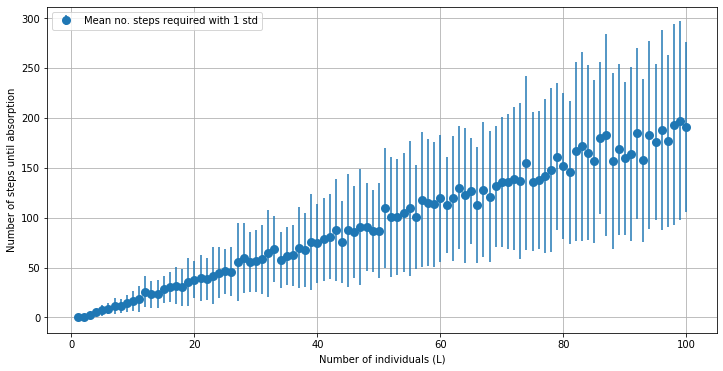

In [7]:
#calculate average and standard deviations over the independent simulations.
average = np.mean(M, axis = 1)
deviation = np.std(M, axis = 1)

#plot steps  needed until absorption against L
plt.figure(figsize = (12,6))
plt.xlabel('Number of individuals (L)')
plt.ylabel('Number of steps until absorption')


plt.errorbar(LL, average, yerr = deviation, fmt = 'o', mew = 3, label = 'Mean no. steps required with 1 std')
plt.legend(loc='upper left')
plt.grid()